# Homework 2: Building Classifiers

UIC CS 412, Spring 2018

_If you have discussed this assignment with anyone, please state their name(s) here: [NAMES]. Keep in mind the expectations set in the Academic Honesty part of the syllabus._

In this homework, you will build classifiers using decision trees, nearest neighbors, and perceptron, to make decisions on a few different datasets. The code for this project consists of several Python files, some of
which you will need to read and understand in order to complete the
assignment, and some of which you can ignore.

This assignment is adapted from the github materials for [A Course in Machine Learning](https://github.com/hal3/ciml).

## Due Date

This assignment is due at 11:59pm Tuesday, February 20th. 

### Files You'll Edit

``dumbClassifiers.py``: This contains a handful of "warm up"
classifiers to get you used to our classification framework.
  
``dt.py``: Will be your simple implementation of a decision tree classifier.
  
``knn.py``: This is where your nearest-neighbor classifier modifications
will go.

``perceptron.py``: The perceptron file you need to edit.

### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: all of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above together with your notebook **hw2.ipynb** as a single zip file **h2.zip** on Gradescope under *Homework 2*.  The programming part constitutes 60% of the grade for this homework. You also need to answer the questions denoted by **WU#** (and a kitten) in this notebook which are the other 40% of your homework grade. When you are done, you should export **hw2.ipynb** with your answers as a PDF file **hw2WrittenPart.pdf** and upload the PDF file to Gradescope under *Homework 2 - Written Part*. 

Your entire homework will be considered late if any of these parts are submitted late. 

#### Autograding

Your code will be autograded for technical correctness. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. We have provided two simple test cases that you can try your code on, see ``run_tests_simple.py``. As usual, you should create more test cases to make sure your code runs correctly.

# Part 1: Simple classifiers (5%)

Let's begin our foray into classification by looking at some very
simple classifiers.  There are two classifiers
in ``dumbClassifiers.py``, one is implemented for you, the other
one you will need to fill in appropriately.

The already implemented one is ``AlwaysPredictOne``, a classifier that
(as its name suggest) always predicts the positive class.  We're going
to use the ``SentimentData`` dataset from ``datasets.py`` as a running
example to test your functions.  Let's see how well 
this classifier does on this data.  You should begin by importing ``util``,
``datasets``, ``binary`` and ``dumbClassifiers``.  Also, be sure you
always have ``from numpy import *`` and ``from pylab import *``. You
can achieve this with ``from imports import *`` to make life easier.

We will look at a simple binary classification task: sentiment analysis (is this review a positive or negative evaluation of a product?). We'll use the presence/absence of words in the text as features. If you look in data/sentiment.all, you'll see the data for the sentiment prediction task. The first column contains the class value of zero or one (one = positive, zero = negative). The rest is a list of all the words that appear in this product reivew. These are binary features: any word listed has value "=1" and any word not listed has value "=0" (implicitly... it would be painful to list all non-occurring words!).
As you write these functions, feel free to test your code on the much smaller TennisData dataset provided in datasets.py, so you can visually inspect correctness of your output. We have also provided some of the expected outputs as comments, so you can check whether you are getting the correct results.

In [1]:
import dumbClassifiers, datasets, util
from imports import *

h = dumbClassifiers.AlwaysPredictOne({})
print(h)
# AlwaysPredictOne
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h.predictAll(datasets.SentimentData.X)
# array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
datasets.SentimentData.X

AlwaysPredictOne


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Indeed, it looks like it's always predicting one!

Now, let's compare these predictions to the truth.  Here's a very
clever way to compute accuracies:

In [2]:
mean((datasets.SentimentData.Y > 0) == (h.predictAll(datasets.SentimentData.X) > 0))
# 0.50416666666666665

0.5041666666666667

That's training accuracy; let's check test accuracy:

In [3]:
mean((datasets.SentimentData.Yte > 0) == (h.predictAll(datasets.SentimentData.Xte) > 0))
# 0.50249999999999995

0.5025

Okay, so it does pretty badly.  That's not surprising, it's really not
learning anything!!!

Now, let's use some of the built-in functionality to help do some of
the grunt work for us.  You'll need to import ``runClassifier``.

In [4]:
import runClassifier
runClassifier.trainTestSet(h, datasets.SentimentData)
# Training accuracy 0.5041666666666667, test accuracy 0.5025

Training accuracy 0.5041666666666667, test accuracy 0.5025


Very convenient!

Now, your first implementation task will be to implement the missing
functionality in ``AlwaysPredictMostFrequent`` in dumbClassifiers.py.  This actually
will "learn" something simple.  Upon receiving training data, it will
simply remember whether +1 is more common or -1 is more common.  It
will then always predict this label for future data.  Once you've
implemented this, you can test it:

In [5]:
h = dumbClassifiers.AlwaysPredictMostFrequent({})
runClassifier.trainTestSet(h, datasets.SentimentData)
# Training accuracy 0.5041666666666667, test accuracy 0.5025
print(h)
# AlwaysPredictMostFrequent(1)

Training accuracy 0.5041666666666667, test accuracy 0.5025
AlwaysPredictMostFrequent(1)


Okay, so it does the same as ``AlwaysPredictOne``, but that's
because +1 is more common in that training data (i.e., the majority class is '1'). 

We can use more runClassifier functions to generate learning curves and hyperparameter curves:  

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 3 points...
Training accuracy 0.6666666666666666, test accuracy 0.5025
Training classifier on 5 points...
Training accuracy 0.6, test accuracy 0.5025
Training classifier on 10 points...
Training accuracy 0.7, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 0.47368421052631576, test accuracy 0.5025
Training classifier on 38 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 75 points...
Training accuracy 0.5066666666666667, test accuracy 0.5025
Training classifier on 150 points...
Training accuracy 0.46, test accuracy 0.5025
Training classifier on 300 points...
Training accuracy 0.4866666666666667, test accuracy 0.5025
Training classifier on 600 points...
Training accuracy 0.5016666666666667, test accuracy 0.5025
Training classifier on 1200 points...
Training accuracy 0.5041666666666667, test accuracy 0.5025


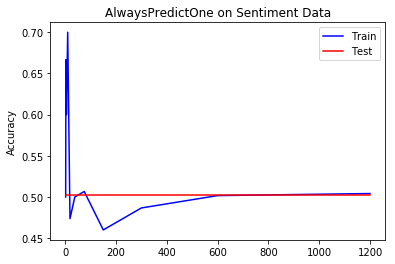

In [6]:
curve = runClassifier.learningCurveSet(dumbClassifiers.AlwaysPredictOne({}), datasets.SentimentData)
runClassifier.plotCurve('AlwaysPredictOne on Sentiment Data', curve)

You should be able to see how the accuracy changes as more training data is used. 

# Part 2: Decision trees (45%)

Next, you will build decision trees both using the python package sklearn and using your own function.

## 2.1 Training (5%)


Load the sentiment analysis dataset and transform the words in each review into a bag-of-words format (0 and 1). 

In [7]:
from sklearn.tree import DecisionTreeClassifier
import data

X,Y,dictionary = data.loadTextDataBinary('data/sentiment.tr')
print(X)
print(Y)
print(X.shape)
print(Y.shape)


[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 1. 0. ... 0. 1. 0.]
(1400, 3473)
(1400,)


We have successfully loaded 1400 examples of sentiment training data. The vocabulary size is 3473 words; we can look at the first ten words (arbitrarily sorted):

In [8]:
dictionary[:10]

['wondering',
 'plot',
 'box',
 'millions',
 'discovered',
 'todd',
 'walk',
 'alan',
 'meeting',
 'nick']

Train a decision tree of depth 1 on the sentiment analysis dataset.

In [9]:
#from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, Y)
# check the default values of the DecisionTreeClassifier parameters
DecisionTreeClassifier?

data.showTree(dt, dictionary)

# bad?
# -N-> class 1	(333 for class 0, 533 for class 1)
# -Y-> class 0	(358 for class 0, 176 for class 1)

bad?
-N-> class 1	(333.0 for class 0, 533.0 for class 1)
-Y-> class 0	(358.0 for class 0, 176.0 for class 1)


This shows that if you only have one question you can ask about the review it's that you should ask if the review contains the word "bad" or not. If it does not ("N") then it's probably a positive review (by a vote of 533 to 333); if it does ("Y") then it's probable a negative review (by a vote of 358 to 176).

Let's look at training accuracy for the tree of depth 1:

In [10]:
np.mean(dt.predict(X) == Y)
# 0.63642857142857145

0.6364285714285715

It's not enough to just think about training data; we need to see how well these trees generalize to new data. 

In [11]:
Xde,Yde,_ = data.loadTextDataBinary('data/sentiment.de', dictionary)
np.mean(dt.predict(Xde) == Yde)
# 0.60499999999999998

0.605

Note: when we load the development data, we have to give it the dictionary we built on the training data so that words are mapped to integers in the same way!

Here, we see that the accuracy has dropped a bit.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU1 (2%):

Your first decision tree task is to build and show a decision tree of depth 2, and answer a few questions about it. Convince yourself whether or not it is useful to go from depth one to depth two on this data. How do you know?

In [12]:
#from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(X, Y)

# data.showTree(dt, dictionary)
print(np.mean(dt2.predict(X) == Y))
print(np.mean(dt2.predict(Xde) == Yde))
data.showTree(dt2, dictionary)


0.66
0.62
bad?
-N-> worst?
|    -N-> class 1	(281.0 for class 0, 514.0 for class 1)
|    -Y-> class 0	(52.0 for class 0, 19.0 for class 1)
-Y-> stupid?
|    -N-> class 0	(281.0 for class 0, 168.0 for class 1)
|    -Y-> class 0	(77.0 for class 0, 8.0 for class 1)


Q: Is it useful to go from depth one to depth two on this data? How do you know?

A: It is useful to from depth 1 to depth 2. We know this as we get higher training accuracy and it has generalized better as we have a look at the accuracy with validation set on sentiment.de dataset.

It's important to recognize that decision trees are essentially learning conjunctions of features. In particular, you can convert a decision tree to a sequence of if-then-else statements, of the form:

if A and B and C and D then return POSITIVE elif A and B and C and !D then return NEGATIVE elif ...

This is called a "decision list." 

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU2 (1%): 
Write down the decision list corresponding to the tree that you learned of depth 2:

A: if not bad and worst then return NEGATIVE (Class 0) elif not bad and not worst then return POSITIVE (class 1) elif bad and not stupid then return NEGATIVE (Class 0) elif bad and stupid then return NEGATIVE (Class 0) 

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU3 (2%): 
Build a depth 3 decision tree and "explain" it. In other words, if your boss asked you to tell her, intuitively, what your tree is doing, how would you explain it? Write a few sentences.

[YOUR WU3 ANSWER HERE]

In [13]:
dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(X, Y)
print(np.mean(dt3.predict(Xde) == Yde))
data.showTree(dt3, dictionary)

0.645
bad?
-N-> worst?
|    -N-> many?
|    |    -N-> class 1	(204.0 for class 0, 274.0 for class 1)
|    |    -Y-> class 1	(77.0 for class 0, 240.0 for class 1)
|    -Y-> present?
|    |    -N-> class 0	(52.0 for class 0, 13.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 6.0 for class 1)
-Y-> stupid?
|    -N-> wonderfully?
|    |    -N-> class 0	(280.0 for class 0, 153.0 for class 1)
|    |    -Y-> class 1	(1.0 for class 0, 15.0 for class 1)
|    -Y-> bob?
|    |    -N-> class 0	(76.0 for class 0, 4.0 for class 1)
|    |    -Y-> class 1	(1.0 for class 0, 4.0 for class 1)


## 2.2 Underfitting and overfitting (10%)

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU4 (5%): 
For all possible depths from depth 1 to depth 20, compute training error, development error and test error (on data/sentiment.te) for the corresponding decision tree (hint: use a for loop). Plot these three curves. You can add a cell below if you want to write the code for the plot or if you must, we would accept an inserted picture of a plot created elsewhere. Make sure your axes are clearly marked.

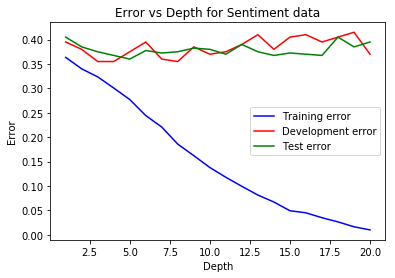

In [14]:
depthArray = []
avgErrorTraining = []
minAvgErrorTraining = float("inf")
avgErrorDev = []
minAvgErrorDev = float("inf")
avgErrorTest = []
minAvgErrorTest = float("inf")
bestTrainingDepth = 0
bestDevDepth = 0
bestTestDepth = 0

for depth in range(1,21):
    
    dtree = DecisionTreeClassifier(max_depth=depth)
    #Training
    dtree.fit(X, Y)
    
    #Calculating Training error
    averageTrainingError = np.mean(abs(dtree.predict(X) - Y))
    avgErrorTraining.append(averageTrainingError)
    if averageTrainingError<minAvgErrorTraining:
        minAvgErrorTraining = averageTrainingError
        bestTrainingDepth = depth

    
    #Calculating Development error
    averageDevError = np.mean(abs(dtree.predict(Xde) - Yde))
    avgErrorDev.append(averageDevError)
    if averageDevError<minAvgErrorDev:
        minAvgErrorDev = averageDevError
        bestDevDepth = depth
        
    Xte,Yte,_ = data.loadTextDataBinary('data/sentiment.te', dictionary)
    #Calculating Test error
    averageTestError = np.mean(abs(dtree.predict(Xte) - Yte))
    avgErrorTest.append(averageTestError)
    if averageTestError<minAvgErrorTest:
        minAvgErrorTest = averageTestError
        bestTestDepth = depth
    
    depthArray.append(depth)

plot(depthArray,avgErrorTraining,'b-', label='Training error')
plot(depthArray,avgErrorDev,'r-', label='Development error')
plot(depthArray,avgErrorTest,'g-', label='Test error')
xlabel('Depth')
ylabel('Error')
title('Error vs Depth for Sentiment data')
legend(loc='center right')





<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU5 (5%): 
If you were to choose the depth hyperparameter based on TRAINING data, what TEST error would you get? If you were to choose depth based on the DEV data, what TEST error would you get? Finally, if you were to choose the depth based on the TEST data, what TEST error would you get. Precisely one of these three is "correct" -- which one and why?


In [15]:
print("If we choose depth based on Training data, we will get a Test Error of",avgErrorTest[bestTrainingDepth-1])
print("\nIf we choose depth based on DEV data, we will get a Test Error of",avgErrorTest[bestDevDepth-1])
print("\nIf we choose depth based on TEST data, we will get a Test Error of",avgErrorTest[bestTestDepth-1])

If we choose depth based on Training data, we will get a Test Error of 0.395

If we choose depth based on DEV data, we will get a Test Error of 0.375

If we choose depth based on TEST data, we will get a Test Error of 0.36


Choosing the depth hyperparameter based  on DEV data is the only correct option. 

Choosing a hyperparameter based on Training data will result in overfitting as we use training data to learn from fixed hyperparameters. This won't generalize well for Test data (future data).
We cannot choose Test data either as Test data represent the future data and should be untouched in the entire process. Using Test data for choosing hyperparameter, can result in overfitting to Test data. 


Validation or Dev dataset is used for choosing hyperparameters as it is not directly involved in training but represent the dataset to tweak the hyperparameters for training. 

## 2.3 Implementing a decision tree (30%)

Our next task is to implement a decision tree classifier.  There is
stub code in ``dt.py`` that you should edit.  Decision trees are
stored as simple data structures.  Each node in the tree has
a ``.isLeaf`` boolean that tells us if this node is a leaf (as
opposed to an internal node).  Leaf nodes have a ``.label`` field
that says what class to return at this leaf.  Internal nodes have:
a ``.feature`` value that tells us what feature to split on;
a ``.left`` *tree* that tells us what to do when the feature
value is *less than 0.5*; and a ``.right`` *tree* that
tells us what to do when the feature value is *at least 0.5*.
To get a sense of how the data structure works, look at
the ``displayTree`` function that prints out a tree.

Your first task is to implement the training procedure for decision
trees.  We've provided a fair amount of the code, which should help
you guard against corner cases.  (Hint: take a look
at ``util.py`` for some useful functions for implementing
training.  Once you've implemented the training function, we can test
it on data:

In [16]:
import dt
h = dt.DT({'maxDepth': 2})
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
print(h)
# this should print out something like this (the actual numbers attached to the branches will be different)
#Branch 2428
#  Branch 3842
#    Leaf 1.0
#    Leaf -1.0
#  Branch 3892
#    Leaf -1.0
#    Leaf 1.0

Branch 7402
  Branch 4114
    Leaf 1.0
    Leaf -1.0
  Branch 2088
    Leaf -1.0
    Leaf 1.0



The problem with the branches here is that words have been converted into numeric ids
for features. We can look them up. Your results here might be
different due to hashing, so you will need to change them according to the branch numbers you see in your own output above:

In [18]:
print(datasets.SentimentData.words[7402])
#'bad'
print(datasets.SentimentData.words[4114])
#'worst'
print(datasets.SentimentData.words[2088])
#'sequence'

bad
worst
sequence


Based on this, we can rewrite the tree (by hand) as:

In [18]:
Branch 'bad'
  Branch 'worst'
    Leaf -1.0
    Leaf 1.0
  Branch 'sequence'
    Leaf -1.0
    Leaf 1.0

SyntaxError: invalid syntax (<ipython-input-18-a8be5dbcee70>, line 1)

Now, you should go implement prediction.  This should be easier than
training!  We can test by:

In [19]:
runClassifier.trainTestSet(dt.DT({'maxDepth': 1}), datasets.SentimentData)
#Training accuracy 0.630833, test accuracy 0.595
runClassifier.trainTestSet(dt.DT({'maxDepth': 3}), datasets.SentimentData)
#Training accuracy 0.701667, test accuracy 0.6175
runClassifier.trainTestSet(dt.DT({'maxDepth': 5}), datasets.SentimentData)
#Training accuracy 0.765833, test accuracy 0.62

Training accuracy 0.6308333333333334, test accuracy 0.595
Training accuracy 0.7016666666666667, test accuracy 0.6175
Training accuracy 0.7658333333333334, test accuracy 0.6225


Looks like it does better than the dumb classifiers on training data,
as well as on test data!  Hopefully we can do even better in the
future!

We can use more ``runClassifier`` functions to generate learning
curves and hyperparameter curves:

Training classifier on 2 points...
Training accuracy 1.0, test accuracy 0.52
Training classifier on 3 points...
Training accuracy 1.0, test accuracy 0.4825
Training classifier on 5 points...
Training accuracy 1.0, test accuracy 0.46
Training classifier on 10 points...
Training accuracy 1.0, test accuracy 0.595
Training classifier on 19 points...
Training accuracy 1.0, test accuracy 0.4825
Training classifier on 38 points...
Training accuracy 1.0, test accuracy 0.56
Training classifier on 75 points...
Training accuracy 1.0, test accuracy 0.5425
Training classifier on 150 points...
Training accuracy 0.9466666666666667, test accuracy 0.5775
Training classifier on 300 points...
Training accuracy 0.91, test accuracy 0.59
Training classifier on 600 points...
Training accuracy 0.8816666666666667, test accuracy 0.6
Training classifier on 1200 points...
Training accuracy 0.8341666666666666, test accuracy 0.64


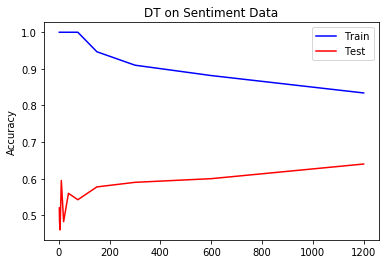

In [20]:
curve = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9}), datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data', curve)

This plots training and test accuracy as a function of the number of
data points (x-axis) used for training and y-axis is accuracy.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU6 (2%):
We should see training accuracy (roughly) going down and test
accuracy (roughly) going up.  Why does training accuracy tend to go
*down?* Why is test accuracy not monotonically increasing? You should
also see jaggedness in the test curve toward the left. Why?

Ans: With increase in data points, training data will find it hard to fit (overfit) all the data points. Thus, the testing accuracy falls. However, at the same time, increased amount of data points allows test accuracy to increase as it allows better generalisation when trained on trained dataset. Better genrealisation can result in higher test accuracy.


We can also generate similar curves by changing the maximum depth
hyperparameter:

Training classifier with maxDepth=1...
Training accuracy 0.6308333333333334, test accuracy 0.595
Training classifier with maxDepth=2...
Training accuracy 0.6675, test accuracy 0.5825
Training classifier with maxDepth=4...
Training accuracy 0.7325, test accuracy 0.635
Training classifier with maxDepth=6...
Training accuracy 0.7891666666666667, test accuracy 0.6375
Training classifier with maxDepth=8...
Training accuracy 0.8233333333333334, test accuracy 0.6425
Training classifier with maxDepth=12...
Training accuracy 0.8625, test accuracy 0.6425
Training classifier with maxDepth=16...
Training accuracy 0.8916666666666667, test accuracy 0.635


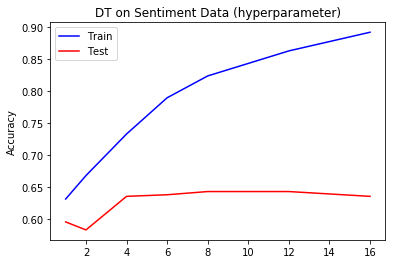

In [21]:
curve = runClassifier.hyperparamCurveSet(dt.DT({}), 'maxDepth', [1,2,4,6,8,12,16], datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data (hyperparameter)', curve)

Now, the x-axis is the value of the maximum depth.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU7 (3%):
You should see training accuracy monotonically increasing and
test accuracy making something like a hill.  Which of these is
*guaranteed* to happen and which is just something we might expect to
happen?  Why?

Training acuraccy is guaranteed to be monotonically increasing as it will continue to overfit at higher depth. The test acuraccy graph is something we expect to happen but we cannot guarantee it. It depends on factors like if the test set is a good enough general representative of what the test set looks like. It hits the peak at the perfect fit, it will then typically start overfitting (to the training set) afterwards resulting in a loss of generalisation for test set.


# Part 3: Nearest Neighbors (30 %)


## 3.1 Warm-up exercise (0%)

Our first task will be to use KNN to classify digits. In other words, we get an image 
of a hand-drawn digit (28x28 pixels, greyscale), and have to decide what digit it is. 
To make life simpler, we'll consider only the binary classification version, in two 
setups: (A) distinguishing ONEs from TWOs and (B) distinguishing TWOs from THREEs.

(A) In the data directory, you'll find two .png files that show the training data. 
We are displaying them here. Are there any digits that you, as a human, have difficulty distinguishing 
(if so, list the row/column, where 0,0 is the upper left and 9,9 is the bottom right). 
Which of these (1vs2 or 2vs3) do you expect to be a harder classification problem?

Ans A) (3,7), (4,6) and (4,0) in the (1vs2) and (0,0), (1,1), (6,2), (5,9), and (9,5) are harder to recognize especially without context. I think (2vs3) would be a harder classification problem due to the similarity of 2 and 3 in some cases.
<table>
 <tr>
  <td><img src="data/1vs2.tr.png" width="60%"></td>
  <td><img src="data/2vs3.tr.png" width="60%"></td>
 </tr>
</table>

(B) Let's verify that KNN does very well on training data. Run the following:

In [22]:
import knn_warmup

# importlib.reload(knn_warmup)

tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.tr", 100)
allK = [1]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0

0.0


This says "do KNN, with 1vs2.tr as the training data and 1vs2.tr as the testing data, using K=1." 
The 0.0 is the error rate, which is zero. Verify the same thing for 2vs3.tr.

In [23]:
import knn_warmup

# importlib.reload(knn_warmup)

tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.tr", 100)
allK = [1]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0

0.0


(C) The ``knn_warmup.py`` implementation will let you specify multiple values for K and get error 
rates for all of them. In particular, you can say something like:

In [24]:
allK = [1,5,10,25,50,100]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0	0.08	0.12	0.16	0.28	0.5

0.0	0.03	0.06	0.07	0.16	0.5


This runs the same thing for six values of K (1, 5, ..., 100) and prints the respective 
error rates. Notice that for K=100 the error rate is 50% -- why does this happen?

Ans: As K increases, the model gets more underfit as it becomes more simpler. At the same time, it is overfit for lower values for K like K=1.


(D) Repeat the same exercise, this time evaluating on the development data, and using 
odd values of K ranging from 1 to 21. Do this for both 1vs2 and 2vs3. Which one is 
harder? For each, what is the optimal value of K? (In the case of ties, how would you 
choose to break ties?)

Ans:  is harder. The optimal value of K for (1vs2) is  and the optimal value for K for (2vs3) is . In case of ties, we can break them by .

In [30]:
tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.de", 100)
allK = [1,3,5,7,9,11,13,15,17,19,21]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.16	0.16	0.16	0.16


In [29]:
tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.de", 100)
allK = [1,3,5,7,9,11,13,15,17,19,21]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

0.1	0.04	0.06	0.06	0.08	0.04	0.08	0.06	0.06	0.08	0.08


(E) Now, go edit knn_warmup.py. This might take a bit of effort since you'll have to figure out 
what it's doing. But the function I want you to look at is "classifyKNN." This takes D 
(the training data) and knn (the list of the K nearest neighbors, together with their 
distances). It iterates over each of the (dist,n) nearest neighbors. Here, dist is the 
distance and n is the training example id, so D[n] is the corresponding training example. 
It then "votes" this into a prediction ``yhat``.

Modify this function so that each example gets a weighted vote, where its weight is 
equal to exp(-dist). This should be a one- or two-liner.

Rerun the same experiments as in (D). Does this help or hurt? What do you observe as K 
gets larger and WHY do you observe this?

Ans:


If you want to play around, try exp(-dist / CONSTANT) where CONSTANT now is a hyperparameter. 
What happens as CONSTANT tends toward zero? Tends toward infinity?

Ans:


## 3.2 Implementing a KNN classifier (20%)

To get started with geometry-based classification, we will implement a
nearest neighbor classifier that supports KNN classification.  
This should go in ``knn.py``.  The
only function here that you have to do anything about is
the ``predict`` function, which does all the work.

In order to test your implementation, here are some outputs:

In [ ]:
import knn

runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.TennisData)
#Training accuracy 1, test accuracy 1
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.TennisData)
#Training accuracy 0.785714, test accuracy 0.833333
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.TennisData)
#Training accuracy 0.857143, test accuracy 0.833333

You can also try it on the digits data:

In [ ]:
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.DigitData)
# Training accuracy 1, test accuracy 0.94
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.DigitData)
# Training accuracy 0.94, test accuracy 0.93
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.DigitData)
# Training accuracy 0.92, test accuracy 0.92

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU8 (5%):
For the digits data, generate train/test curves for
varying values of K (you figure out what are good ranges,
this time).  Include those curves. Do you see evidence of overfitting and underfitting?  Next, using K=5, generate learning curves for this
data.

In [ ]:
# INCLUDE YOUR CODE FOR THE PLOTS HERE AND RUN THE CELL TO SHOW THE PLOTS

## 3.3 The curse of dimensionality (10%)

If you have numpy and matplotlib correctly installed, you should be able to run
the code in the following cell
and get a picture of five histograms. Open up ``HighD.py`` to understand what's 
being plotted. Essentially, it's generating 200 random points in D dimensions 
(where D is being varied) and computing pairwise distances between these points.

In [ ]:
import HighD

N    = 200                   # number of examples
Dims = [2, 8, 32, 128, 512]   # dimensionalities to try
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
Bins = arange(0, 1, 0.02)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('dimensionality versus uniform point distances')

for i,d in enumerate(Dims):
    distances = HighD.computeDistances(HighD.generateUniformDataset(d, N))
    print("D={0}, average distance={1}".format(d, mean(distances) * sqrt(d)))
    plt.hist(distances,
             Bins,
             histtype='step',
             color=Cols[i])
    if HighD.waitForEnter:
        plt.legend(['%d dims' % d for d in Dims])
        plt.show(False)
        x = raw_input('Press enter to continue...')


plt.legend(['%d dims' % d for d in Dims])
plt.savefig('fig.pdf')
plt.show()

As you can see in the histograms, as the dimensionality increases, the distances between pairs of points become more or less concentrated around a single value.

In the code, instead of plotting distance on the x-axis, we're plotting (distance/sqrt(D)). Why is this the right thing to do?

The goal here is to look
at whether what we found for uniformly random data points holds for
naturally occurring data (like the digits data) too! We must hope that
it doesn't, otherwise KNN has no hope of working, but let's verify.

The problem is: the digits data is 784 dimensional, period, so it's
not obvious how to try "different dimensionalities." For now, we will
do the simplest thing possible: if we want to have 128 dimensions, we
will just select 128 features randomly.

This is your task, which you can accomplish by munging together
``HighD.py`` and ``KNN.py`` and making appropriate modifications.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU9 (10%):
**A.** First, get a histogram of the raw digits data in 784
dimensions. You'll probably want to use the ``exampleDistance``
function from KNN together with the plotting in ``HighD``. 

**B.** Extend
``exampleDistance`` so that it can subsample features down to some
fixed dimensionality. For example, you might write
``subsampleExampleDistance(x1,x2,D)``, where ``D`` is the target
dimensionality. In this function, you should pick ``D`` dimensions at
random (I would suggest generating a permutation of the number
[1..784] and then taking the first D of them), and then compute the
distance but _only_ looking at those dimensions. 

**C.** Generate an
equivalent plot to HighD with D in [2, 8, 32, 128, 512] but for the
digits data rather than the random data. Include a copy of both plots
and describe the differences.

In [ ]:
# INCLUDE YOUR CODE FOR THE A,B,C PLOTS HERE AND RUN THE CELL TO SHOW THE PLOTS

[YOUR WU9.C ANSWER HERE]


# Part 4: Perceptron (20%)

This final section is all about using perceptrons to make
predictions. You are given a partial perceptron implementation in
``perceptron.py``.

The last implementation you have is for the perceptron; see
``perceptron.py`` where you will have to implement part of the
``nextExample`` function to make a perceptron-style update.

Once you've implemented this, the magic in the ``Binary`` class will
handle training on datasets for you, as long as you specify the number
of epochs (passes over the training data) to run:

In [ ]:
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 1}), datasets.TennisData)
# Training accuracy 0.642857, test accuracy 0.666667
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 2}), datasets.TennisData)
# Training accuracy 0.857143, test accuracy 1

You can view its predictions on the two dimensional data sets:

In [ ]:
runClassifier.plotData(datasets.TwoDDiagonal.X, datasets.TwoDDiagonal.Y)
h = perceptron.Perceptron({'numEpoch': 200})
h.train(datasets.TwoDDiagonal.X, datasets.TwoDDiagonal.Y)
print(h)
# w=array([  7.3,  18.9]), b=0.0
runClassifier.plotClassifier(array([ 7.3, 18.9]), 0.0)

You should see a linear separator that does a pretty good (but not
perfect!) job classifying this data.

Finally, we can try it on the sentiment data:

In [ ]:
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 1}), datasets.SentimentData)
# Training accuracy 0.835833, test accuracy 0.755
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 2}), datasets.SentimentData)
# Training accuracy 0.955, test accuracy 0.7975

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU10 (5%):
Using the tools provided, generate (a) a learning curve
(x-axis=number of training examples) for the perceptron (5 epochs) on
the sentiment data and (b) a plot of number of epochs versus
train/test accuracy on the entire dataset.

In [ ]:
# INCLUDE YOUR CODE FOR THE PLOTS HERE AND RUN THE CELL TO SHOW THE PLOTS